### Ukázka t-SNE pro vizualizaci dat

In [1]:
from sklearn import datasets
mnist = datasets.fetch_openml("mnist_784", version=1)

Celý dataset by byl moc velký na vizualizaci, tak si z něj vezmeme jen část

In [2]:
import numpy as np
m = 10000
idx = np.random.permutation(60000)[:m]

X = mnist['data'].to_numpy()[idx]
y = mnist['target'].to_numpy().astype(int)[idx]

In [3]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

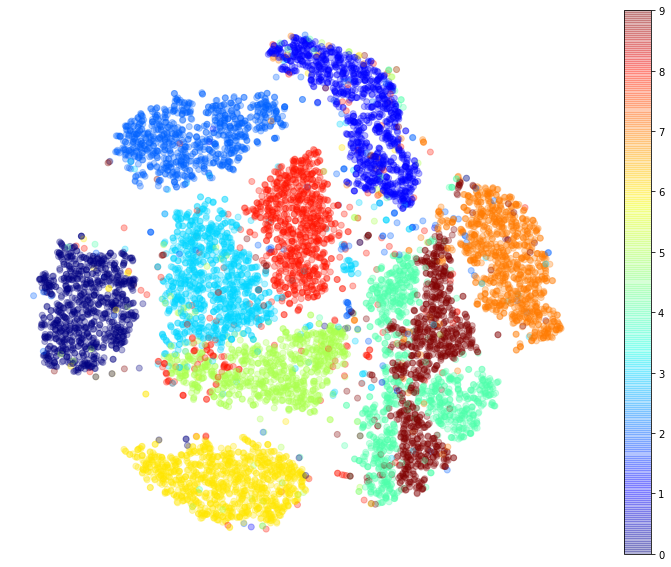

In [4]:
from matplotlib import pyplot as plt

plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet", alpha=0.3)
plt.axis('off')
plt.colorbar()
plt.show()

### Vyzkoušíme ještě Titanic

In [5]:
import os
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


data = pd.read_csv(os.path.join("datasets", "04", "titanic", "train.csv"))

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('one_hot', OneHotEncoder(sparse=False))
])

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, ['Age', 'SibSp', 'Parch', 'Fare']),
    ('cat', cat_pipeline, ['Pclass', 'Sex', 'Embarked']),
])

X = full_pipeline.fit_transform(data)
y = data["Survived"]

In [6]:
X

array([[-0.56573646,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.66386103,  0.43279337, -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [-0.25833709, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.1046374 ,  0.43279337,  2.00893337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.25833709, -0.4745452 , -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.20276197, -0.4745452 , -0.47367361, ...,  0.        ,
         1.        ,  0.        ]])

In [7]:
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

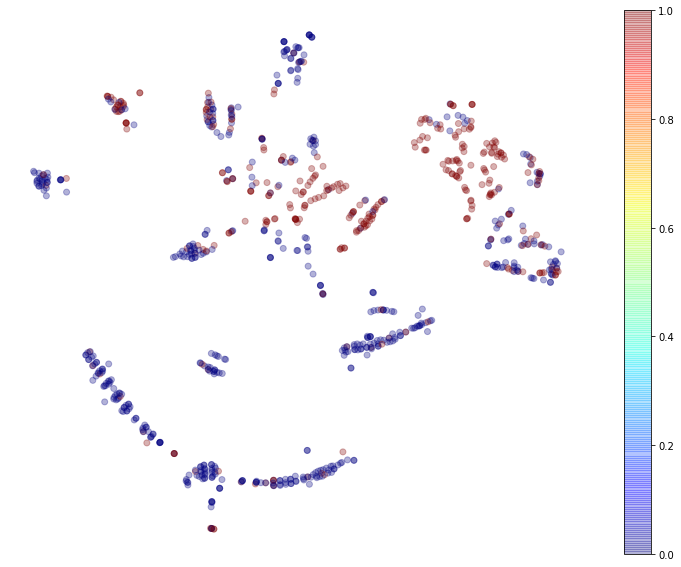

In [8]:
plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet", alpha=0.3)
plt.axis('off')
plt.colorbar()
plt.show()

### A SPAM dataset

In [9]:
data = pd.read_csv(os.path.join("datasets", "05", "spam", "spam.csv"), 
                   encoding='latin-1')
data = data.rename(columns={"v1":"label", "v2":"text"})
data["spam"] = (data["label"] == "spam").astype(int)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfTransformer

pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])

X = pipeline.fit_transform(data["text"])

In [11]:
X.shape

(5572, 8672)

In [12]:
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

In [13]:
y = data["spam"]

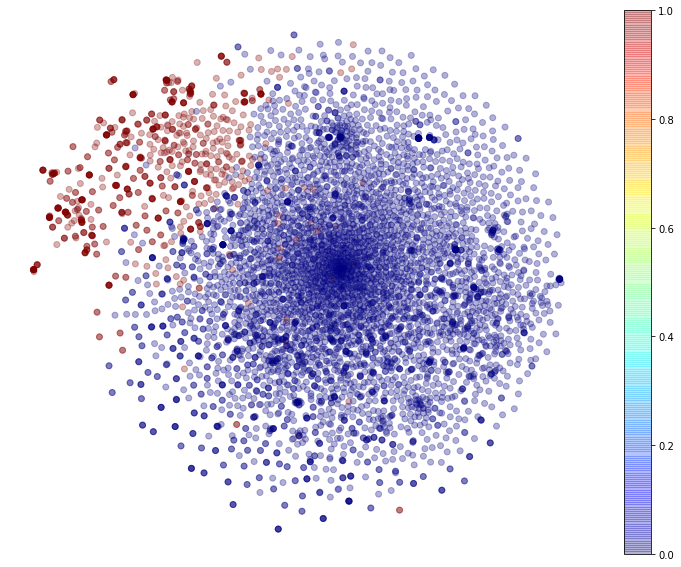

In [14]:
plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet", alpha=0.3)
plt.axis('off')
plt.colorbar()
plt.show()